In [50]:
import os
from main import *
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import missingno as msno

sns.set_style('whitegrid')

# Aeroportos analisados

A partir dos 12 aeroportos fornecidos, foram adquiradas as coordenadas de cada um deles para o calculo da distancia

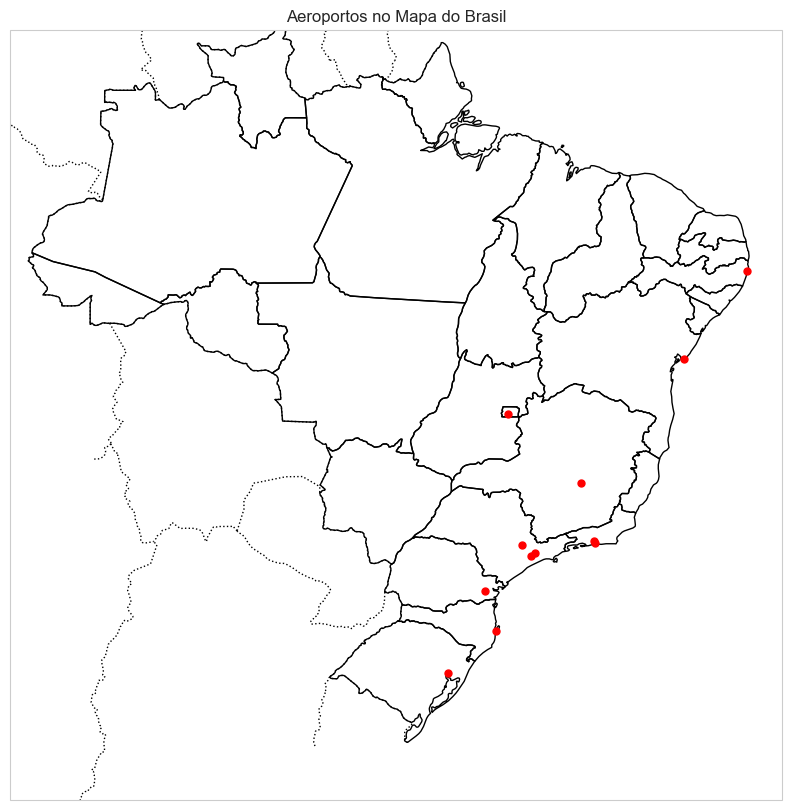

In [51]:
# Criação do mapa
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-75, -33, -35, 5])  # Define a extensão do mapa para cobrir o Brasil


# Adiciona fronteiras dos estados do Brasil como referência
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black')

# Plota os pontos no mapa
for aeroporto, coordenadas in AEROPORTOS.items():
    lat, lon = coordenadas
    ax.plot(lon, lat, 'ro', markersize=5)  # 'ro' indica ponto vermelho
    #ax.text(lon + 0.2, lat, aeroporto, fontsize=12, va='center', ha='left', color='black')
# Título e rótulos dos eixos
plt.title('Aeroportos no Mapa do Brasil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Mostra o mapa
plt.show()


# BIMTRA

## Import do dataset pela API

In [52]:
# Pega o df do BIMTRA da API
df_bimtra_raw = request_api(endpoint='bimtra', inicial_date = '2022-06-01', final_date ='2023-05-13')

In [53]:
df_bimtra_raw['deltaT'] = df_bimtra_raw['dt_arr']-df_bimtra_raw['dt_dep']

df_bimtra_raw[['dt_dep','dt_arr']] = df_bimtra_raw[['dt_dep','dt_arr']]/1000

df_bimtra_raw['dt_dep'] = pd.to_datetime(df_bimtra_raw['dt_dep'], unit ='s')

df_bimtra_raw['hora_ref'] = df_bimtra_raw['dt_dep'].dt.floor('H')

df_bimtra_raw['hora_esperas'] = df_bimtra_raw['hora_ref'] - pd.to_timedelta('1 hour')

df_bimtra_raw['hora_metaf'] = df_bimtra_raw['hora_ref'] + pd.to_timedelta('1 hour')

df_bimtra_raw['hora_metar']  = df_bimtra_raw['hora_ref']

df_bimtra_raw['hora_tcp'] = df_bimtra_raw['hora_ref'] + pd.to_timedelta('1 hour')

df_bimtra_raw

,flightid,origem,destino,dt_dep,dt_arr,deltaT,hora_ref,hora_esperas,hora_metaf,hora_metar,hora_tcp
0,fcb2bf90345705318213ae1307c0f901,SBKP,SBRJ,2022-06-01 00:44:57,1.654047e+09,2463000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00
1,c7c5c10716335b048f86d8c52fcba3f2,SBGR,SBRJ,2022-06-01 00:57:01,1.654047e+09,2152000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00
2,3162de7203a972f071d5a48e8f0f4828,SBBR,SBRJ,2022-06-01 00:26:52,1.654048e+09,4613000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00
3,8fcd243e9b9eebbe62ab145ce04b6ab5,SBKP,SBCF,2022-06-01 00:58:40,1.654048e+09,2581000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 01:00:00
4,504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,2022-06-01 01:00:38,1.654051e+09,5547000,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 02:00:00,2022-06-01 01:00:00,2022-06-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
300342,c4321a6a09b76969df53965fb5390f12,SBBR,SBRF,2023-05-13 12:14:19,1.683988e+09,7564000,2023-05-13 12:00:00,2023-05-13 11:00:00,2023-05-13 13:00:00,2023-05-13 12:00:00,2023-05-13 13:00:00
300343,e4f5686cce45083566945c8946e5d120,SBBR,SBGR,2023-05-13 09:33:15,1.683976e+09,5126000,2023-05-13 09:00:00,2023-05-13 08:00:00,2023-05-13 10:00:00,2023-05-13 09:00:00,2023-05-13 10:00:00
300344,04f65a7c44cf176215520b4c9b4eb37f,SBCF,SBRF,2023-05-13 16:53:53,1.684004e+09,7591000,2023-05-13 16:00:00,2023-05-13 15:00:00,2023-05-13 17:00:00,2023-05-13 16:00:00,2023-05-13 17:00:00
300345,f72a0718e581d01c695faeeff35d81f0,SBSV,SBGR,2023-05-13 05:28:58,1.683964e+09,8743000,2023-05-13 05:00:00,2023-05-13 04:00:00,2023-05-13 06:00:00,2023-05-13 05:00:00,2023-05-13 06:00:00


# CAT-62


In [54]:
# Pega o df do BIMTRA da API
df_cat62 = request_api(endpoint='cat-62', inicial_date ='2022-12-01 00:00:00.000', final_date ='2022-12-02 00:00:00.000')

df_cat62


,flightid,lat,lon,flightlevel,speed,dt_radar
0,b31ba70b25b7279fc1ae8d7920c56dc9,-0.326161,-0.759559,350.0,451.0,1669921263000
1,5385ee71712e2767734b1a22ba578608,-0.425949,-0.839414,170.0,263.0,1669867742000
2,5385ee71712e2767734b1a22ba578608,-0.439366,-0.849092,170.0,261.0,1669866960000
3,5385ee71712e2767734b1a22ba578608,-0.458496,-0.859771,170.0,257.0,1669865943000
4,5385ee71712e2767734b1a22ba578608,-0.505833,-0.887222,180.0,215.0,1669863182000
...,...,...,...,...,...,...
123592,707d489f28dad61fd05a083a45d835b0,-0.411834,-0.782337,300.0,376.0,1669887786000
123593,707d489f28dad61fd05a083a45d835b0,-0.404333,-0.763283,282.0,455.0,1669887183000
123594,707d489f28dad61fd05a083a45d835b0,-0.416969,-0.800194,160.0,301.0,1669888381000
123595,707d489f28dad61fd05a083a45d835b0,-0.420147,-0.804702,126.0,263.0,1669888621000


# ESPERAS

## Duvidas

Esperas? Que diabos é isso?

In [55]:
# Pega o df do ESPERAS DE VOOS da API
df_esperas = request_api(endpoint='esperas', inicial_date = '2022-06-01', final_date ='2023-05-13')

df_esperas[df_esperas['esperas']!=0]

,esperas,hora,aero
548,1,1656014400000,SBBR
902,1,1657288800000,SBBR
1237,3,1658494800000,SBBR
1305,1,1658739600000,SBBR
1323,1,1658804400000,SBBR
...,...,...,...
99423,2,1682175600000,SBSV
99447,1,1682262000000,SBSV
99495,1,1682434800000,SBSV
99880,3,1683820800000,SBSV


In [56]:
df_esperas['hora'] = df_esperas['hora']/1000

df_esperas['hora'] = pd.to_datetime(df_esperas['hora'], unit ='s')


df_esperas

,esperas,hora,aero
0,0,2022-06-01 00:00:00,SBBR
1,0,2022-06-01 01:00:00,SBBR
2,0,2022-06-01 02:00:00,SBBR
3,0,2022-06-01 03:00:00,SBBR
4,0,2022-06-01 04:00:00,SBBR
...,...,...,...
99931,0,2023-05-13 19:00:00,SBSV
99932,0,2023-05-13 20:00:00,SBSV
99933,0,2023-05-13 21:00:00,SBSV
99934,0,2023-05-13 22:00:00,SBSV


# METAF

## Separar em colunas os dados

In [57]:
# Pega o df do ESPERAS DE VOOS da API
df_metaf = request_api(endpoint='metaf',inicial_date = '2022-06-01', final_date ='2023-05-13')

df_metaf

,hora,metaf,aero
0,1659657600000,METAF SBBR 050000Z 05006KT CAVOK 18/04 Q1014=\n,SBBR
1,1659661200000,METAF SBBR 050100Z 01006KT CAVOK 17/05 Q1016=\n,SBBR
2,1659664800000,METAF SBBR 050200Z 35008KT CAVOK 17/05 Q1014=\n,SBBR
3,1659668400000,METAF SBBR 050300Z 34007KT CAVOK 16/05 Q1015=\n,SBBR
4,1659672000000,METAF SBBR 050400Z 34008KT CAVOK 16/05 Q1015=\n,SBBR
...,...,...,...
43933,1684004400000,METAF SBSP 131900Z 14010KT 9999 OVC024 ...,SBSP
43934,1684008000000,METAF SBSP 132000Z 14009KT 9999 BKN033 ...,SBSP
43935,1684011600000,METAF SBSP 132100Z 14008KT 8000 OVC033 ...,SBSP
43936,1684015200000,METAF SBSP 132200Z 14007KT 7000 OVC033 ...,SBSP


In [58]:
df_metaf['hora'] = df_metaf['hora']/1000

df_metaf['hora'] = pd.to_datetime(df_metaf['hora'], unit ='s')

df_metaf

,hora,metaf,aero
0,2022-08-05 00:00:00,METAF SBBR 050000Z 05006KT CAVOK 18/04 Q1014=\n,SBBR
1,2022-08-05 01:00:00,METAF SBBR 050100Z 01006KT CAVOK 17/05 Q1016=\n,SBBR
2,2022-08-05 02:00:00,METAF SBBR 050200Z 35008KT CAVOK 17/05 Q1014=\n,SBBR
3,2022-08-05 03:00:00,METAF SBBR 050300Z 34007KT CAVOK 16/05 Q1015=\n,SBBR
4,2022-08-05 04:00:00,METAF SBBR 050400Z 34008KT CAVOK 16/05 Q1015=\n,SBBR
...,...,...,...
43933,2023-05-13 19:00:00,METAF SBSP 131900Z 14010KT 9999 OVC024 ...,SBSP
43934,2023-05-13 20:00:00,METAF SBSP 132000Z 14009KT 9999 BKN033 ...,SBSP
43935,2023-05-13 21:00:00,METAF SBSP 132100Z 14008KT 8000 OVC033 ...,SBSP
43936,2023-05-13 22:00:00,METAF SBSP 132200Z 14007KT 7000 OVC033 ...,SBSP


# METAR

In [59]:
# Pega o df do ESPERAS DE VOOS da API
df_metar = request_api(endpoint='metar', inicial_date = '2022-06-01', final_date ='2023-05-13')

df_metar

,hora,metar,aero
0,1654041600000,METAR SBBR 010000Z 07002KT CAVOK 21/08 Q1018=,SBBR
1,1654045200000,METAR SBBR 010100Z 10002KT CAVOK 20/09 Q1019=,SBBR
2,1654048800000,METAR SBBR 010200Z 00000KT CAVOK 16/09 Q1019=,SBBR
3,1654052400000,METAR SBBR 010300Z 27002KT CAVOK 16/09 Q1019=,SBBR
4,1654056000000,METAR SBBR 010400Z 00000KT CAVOK 14/09 Q1018=,SBBR
...,...,...,...
106739,1684004400000,METAR SBSV 131900Z 16009KT 9999 BKN020 FEW021T...,SBSV
106740,1684008000000,METAR SBSV 132000Z 13007KT 9999 BKN020 29/24 Q...,SBSV
106741,1684011600000,METAR SBSV 132100Z 12005KT 9999 SCT020 FEW025T...,SBSV
106742,1684015200000,METAR SBSV 132200Z 11006KT 9999 SCT020 FEW025T...,SBSV


In [60]:
df_metar['hora'] = df_metar['hora']/1000

df_metar['hora'] = pd.to_datetime(df_metar['hora'], unit ='s')

df_metar

,hora,metar,aero
0,2022-06-01 00:00:00,METAR SBBR 010000Z 07002KT CAVOK 21/08 Q1018=,SBBR
1,2022-06-01 01:00:00,METAR SBBR 010100Z 10002KT CAVOK 20/09 Q1019=,SBBR
2,2022-06-01 02:00:00,METAR SBBR 010200Z 00000KT CAVOK 16/09 Q1019=,SBBR
3,2022-06-01 03:00:00,METAR SBBR 010300Z 27002KT CAVOK 16/09 Q1019=,SBBR
4,2022-06-01 04:00:00,METAR SBBR 010400Z 00000KT CAVOK 14/09 Q1018=,SBBR
...,...,...,...
106739,2023-05-13 19:00:00,METAR SBSV 131900Z 16009KT 9999 BKN020 FEW021T...,SBSV
106740,2023-05-13 20:00:00,METAR SBSV 132000Z 13007KT 9999 BKN020 29/24 Q...,SBSV
106741,2023-05-13 21:00:00,METAR SBSV 132100Z 12005KT 9999 SCT020 FEW025T...,SBSV
106742,2023-05-13 22:00:00,METAR SBSV 132200Z 11006KT 9999 SCT020 FEW025T...,SBSV


# SATELITE

In [61]:
# Pega o df do ESPERAS DE VOOS da API
df_satelite = request_api(endpoint='satelite', inicial_date = '2022-06-01', final_date ='2023-05-13')

df_satelite

,data,path,tamanho
0,2022-06-01 01:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1879673
1,2022-06-01 02:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1877693
2,2022-06-01 03:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1887299
3,2022-06-01 04:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1890950
4,2022-06-01 05:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1892776
...,...,...,...
8282,2023-05-13 19:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1830030
8283,2023-05-13 20:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1828890
8284,2023-05-13 21:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1823160
8285,2023-05-13 22:00:00,http://satelite.cptec.inpe.br/repositoriogoes/...,1809551


# TC Prev


In [62]:
# Pega o df do ESPERAS DE VOOS da API
df_tcprev = request_api(endpoint='tc-prev', inicial_date = '2022-06-01', final_date ='2023-05-13')

df_tcprev

,hora,troca,aero
0,1654041600000,0,BR
1,1654045200000,0,BR
2,1654048800000,0,BR
3,1654052400000,0,BR
4,1654056000000,0,BR
...,...,...,...
99931,1684004400000,0,SV
99932,1684008000000,0,SV
99933,1684011600000,0,SV
99934,1684015200000,0,SV


In [63]:
df_tcprev['hora'] = df_tcprev['hora']/1000

df_tcprev['hora'] = pd.to_datetime(df_tcprev['hora'], unit ='s')

df_tcprev['aero'] = 'SB' + df_tcprev['aero']

df_tcprev

,hora,troca,aero
0,2022-06-01 00:00:00,0,SBBR
1,2022-06-01 01:00:00,0,SBBR
2,2022-06-01 02:00:00,0,SBBR
3,2022-06-01 03:00:00,0,SBBR
4,2022-06-01 04:00:00,0,SBBR
...,...,...,...
99931,2023-05-13 19:00:00,0,SBSV
99932,2023-05-13 20:00:00,0,SBSV
99933,2023-05-13 21:00:00,0,SBSV
99934,2023-05-13 22:00:00,0,SBSV


# TC Real

In [64]:
# Pega o df do ESPERAS DE VOOS da API
df_tcreal = request_api(endpoint='tc-real', inicial_date = '2022-06-01', final_date ='2023-05-13')

df_tcreal

,hora,nova_cabeceira,antiga_cabeceira,aero
0,1654092843000,32,03,FL
1,1654109470000,18,12,RF
2,1654110745000,16,13,CF
3,1654110758000,15,26,GL
4,1654110777000,15,26,GL
...,...,...,...,...
33426,1683991948000,14,08,FL
33427,1684015596000,17R,12,SP
33428,1683992504000,15,26,CT
33429,1684017668000,17R,12,SP


# Merge dos dados

In [65]:
# Pega o df do BIMTRA da API
df_bimtra_raw.head(5)

data_raw = df_bimtra_raw.copy()

In [66]:
data_raw = data_raw.merge(df_esperas, left_on=['hora_esperas','destino'], right_on=['hora','aero'], how='left', suffixes=('', '_esperas'))

data_raw = data_raw.merge(df_metaf[['hora','metaf','aero']], left_on=['hora_metaf','destino'], right_on=['hora','aero'], how='left', suffixes=('', '_metaf'))

data_raw = data_raw.merge(df_metar[['hora','metar','aero']], left_on=['hora_metar','destino'], right_on=['hora','aero'], how='left', suffixes=('', '_metar'))

data_raw = data_raw.merge(df_tcprev[['hora','troca','aero']], left_on=['hora_tcp','destino'], right_on=['hora','aero'], how='left', suffixes=('', '_tcp'))

data_raw.head()

,flightid,origem,destino,dt_dep,dt_arr,deltaT,hora_ref,hora_esperas,hora_metaf,hora_metar,...,aero,hora_metaf,metaf,aero_metaf,hora_metar,metar,aero_metar,hora_tcp,troca,aero_tcp
0,fcb2bf90345705318213ae1307c0f901,SBKP,SBRJ,2022-06-01 00:44:57,1.654047e+09,2463000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,...,NaN,NaT,NaN,NaN,2022-06-01 00:00:00,METAR SBRJ 010000Z 17006KT 9999 SCT025 OVC050 ...,SBRJ,2022-06-01 01:00:00,0.0,SBRJ
1,c7c5c10716335b048f86d8c52fcba3f2,SBGR,SBRJ,2022-06-01 00:57:01,1.654047e+09,2152000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,...,NaN,NaT,NaN,NaN,2022-06-01 00:00:00,METAR SBRJ 010000Z 17006KT 9999 SCT025 OVC050 ...,SBRJ,2022-06-01 01:00:00,0.0,SBRJ
2,3162de7203a972f071d5a48e8f0f4828,SBBR,SBRJ,2022-06-01 00:26:52,1.654048e+09,4613000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,...,NaN,NaT,NaN,NaN,2022-06-01 00:00:00,METAR SBRJ 010000Z 17006KT 9999 SCT025 OVC050 ...,SBRJ,2022-06-01 01:00:00,0.0,SBRJ
3,8fcd243e9b9eebbe62ab145ce04b6ab5,SBKP,SBCF,2022-06-01 00:58:40,1.654048e+09,2581000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,...,NaN,NaT,NaN,NaN,2022-06-01 00:00:00,METAR SBCF 010000Z 12006KT CAVOK 21/14 Q1018=,SBCF,2022-06-01 01:00:00,0.0,SBCF
4,504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,2022-06-01 01:00:38,1.654051e+09,5547000,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 02:00:00,2022-06-01 01:00:00,...,SBFL,NaT,NaN,NaN,2022-06-01 01:00:00,METAR SBFL 010100Z 15005KT 9999 BKN030 13/07 Q...,SBFL,2022-06-01 02:00:00,0.0,SBFL


# Baseline Model

## Drop de Colunas

In [67]:
data = data_raw[data_raw.columns.drop([ 'dt_arr','hora_ref', 'hora_esperas', 'hora_metaf', 'hora_metar', 'hora_tcp','hora', 'aero', 'hora_metaf', 'metaf', 'aero_metaf','hora_metar', 'metar', 'aero_metar', 'hora_tcp', 'aero_tcp'])].copy()

data['deltaT']= data['deltaT']/1000

# Checkagem dos dados faltantes

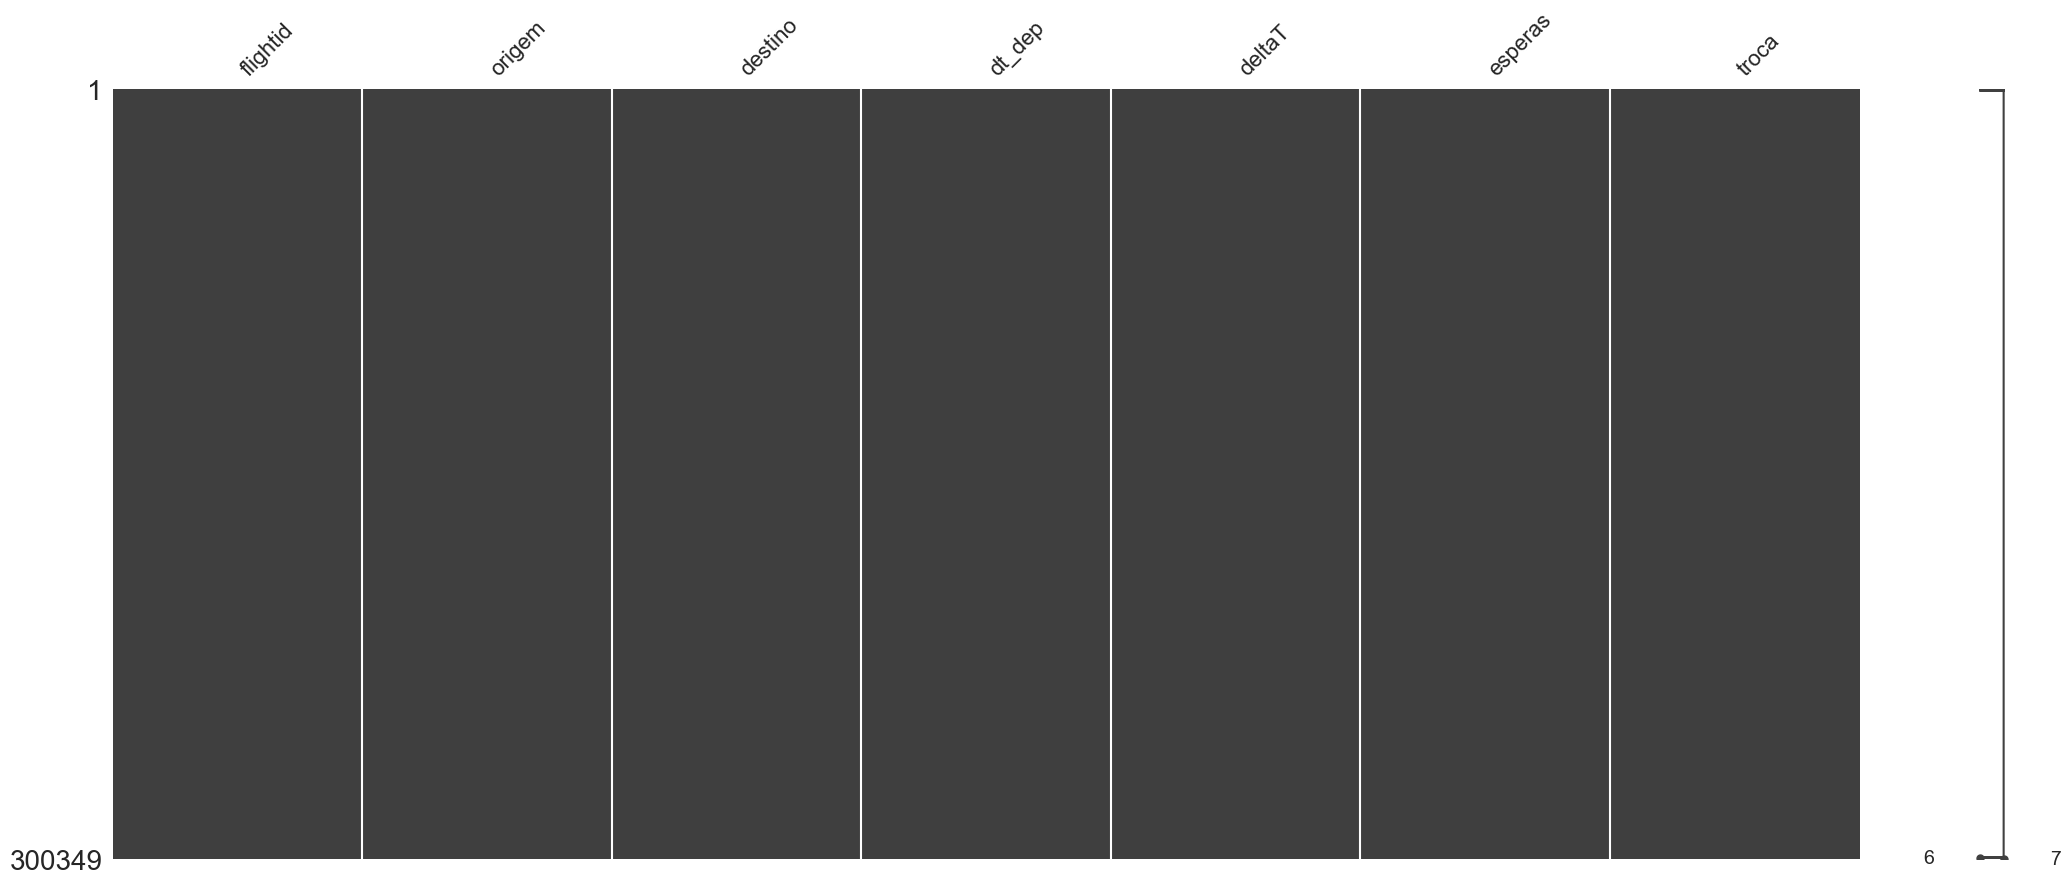

In [68]:
msno.matrix(data)
plt.show()

In [69]:
data = data.dropna()
data

,flightid,origem,destino,dt_dep,deltaT,esperas,troca
4,504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,2022-06-01 01:00:38,5547.0,0.0,0.0
6,052050016538ab736a254313ef009a6b,SBRJ,SBCF,2022-06-01 09:20:04,3006.0,0.0,0.0
8,e93e3b8510854a55f195788019b5763b,SBGR,SBPA,2022-06-01 01:20:45,5020.0,0.0,0.0
9,2386fcd950814c8d343d93c4b51585d1,SBGR,SBPA,2022-06-01 01:13:59,5262.0,0.0,0.0
11,f738e67220fcd688fed028a6389891e2,SBKP,SBPA,2022-06-01 01:26:38,5084.0,0.0,0.0
...,...,...,...,...,...,...,...
300344,c4321a6a09b76969df53965fb5390f12,SBBR,SBRF,2023-05-13 12:14:19,7564.0,0.0,0.0
300345,e4f5686cce45083566945c8946e5d120,SBBR,SBGR,2023-05-13 09:33:15,5126.0,0.0,0.0
300346,04f65a7c44cf176215520b4c9b4eb37f,SBCF,SBRF,2023-05-13 16:53:53,7591.0,0.0,0.0
300347,f72a0718e581d01c695faeeff35d81f0,SBSV,SBGR,2023-05-13 05:28:58,8743.0,0.0,0.0


# Tipos dos dados

In [70]:
data[['esperas','troca']]=data[['esperas','troca']].astype('int')

data.dtypes

flightid            object
origem              object
destino             object
dt_dep      datetime64[ns]
deltaT             float64
esperas              int32
troca                int32
dtype: object

In [71]:
# Cálculo da distancia entre as coordenadas do aeroporto
data['distance'] = data.apply(calcular_distancia, axis=1)

data

,flightid,origem,destino,dt_dep,deltaT,esperas,troca,distance
4,504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,2022-06-01 01:00:38,5547.0,0,0,1007.982120
6,052050016538ab736a254313ef009a6b,SBRJ,SBCF,2022-06-01 09:20:04,3006.0,0,0,373.769188
8,e93e3b8510854a55f195788019b5763b,SBGR,SBPA,2022-06-01 01:20:45,5020.0,0,0,866.126835
9,2386fcd950814c8d343d93c4b51585d1,SBGR,SBPA,2022-06-01 01:13:59,5262.0,0,0,866.126835
11,f738e67220fcd688fed028a6389891e2,SBKP,SBPA,2022-06-01 01:26:38,5084.0,0,0,874.428439
...,...,...,...,...,...,...,...,...
300344,c4321a6a09b76969df53965fb5390f12,SBBR,SBRF,2023-05-13 12:14:19,7564.0,0,0,1654.523543
300345,e4f5686cce45083566945c8946e5d120,SBBR,SBGR,2023-05-13 09:33:15,5126.0,0,0,854.437636
300346,04f65a7c44cf176215520b4c9b4eb37f,SBCF,SBRF,2023-05-13 16:53:53,7591.0,0,0,1608.642575
300347,f72a0718e581d01c695faeeff35d81f0,SBSV,SBGR,2023-05-13 05:28:58,8743.0,0,0,1450.625163


In [72]:
trajetorias = pd.read_csv('trajetorias.csv')
trajetorias.head(5)

,origem,destino,distanceCAT
0,SBBR,SBCF,530.088320
1,SBBR,SBCT,960.846804
2,SBBR,SBFL,1179.012443
3,SBBR,SBGL,835.498310
4,SBBR,SBGR,816.533272


In [73]:
data_merge = data.merge(trajetorias, on=['origem','destino'],how='left')
data_merge.head(5)

,flightid,origem,destino,dt_dep,deltaT,esperas,troca,distance,distanceCAT
0,504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,2022-06-01 01:00:38,5547.0,0,0,1007.982120,910.178961
1,052050016538ab736a254313ef009a6b,SBRJ,SBCF,2022-06-01 09:20:04,3006.0,0,0,373.769188,411.540159
2,e93e3b8510854a55f195788019b5763b,SBGR,SBPA,2022-06-01 01:20:45,5020.0,0,0,866.126835,809.864437
3,2386fcd950814c8d343d93c4b51585d1,SBGR,SBPA,2022-06-01 01:13:59,5262.0,0,0,866.126835,809.864437
4,f738e67220fcd688fed028a6389891e2,SBKP,SBPA,2022-06-01 01:26:38,5084.0,0,0,874.428439,794.273105


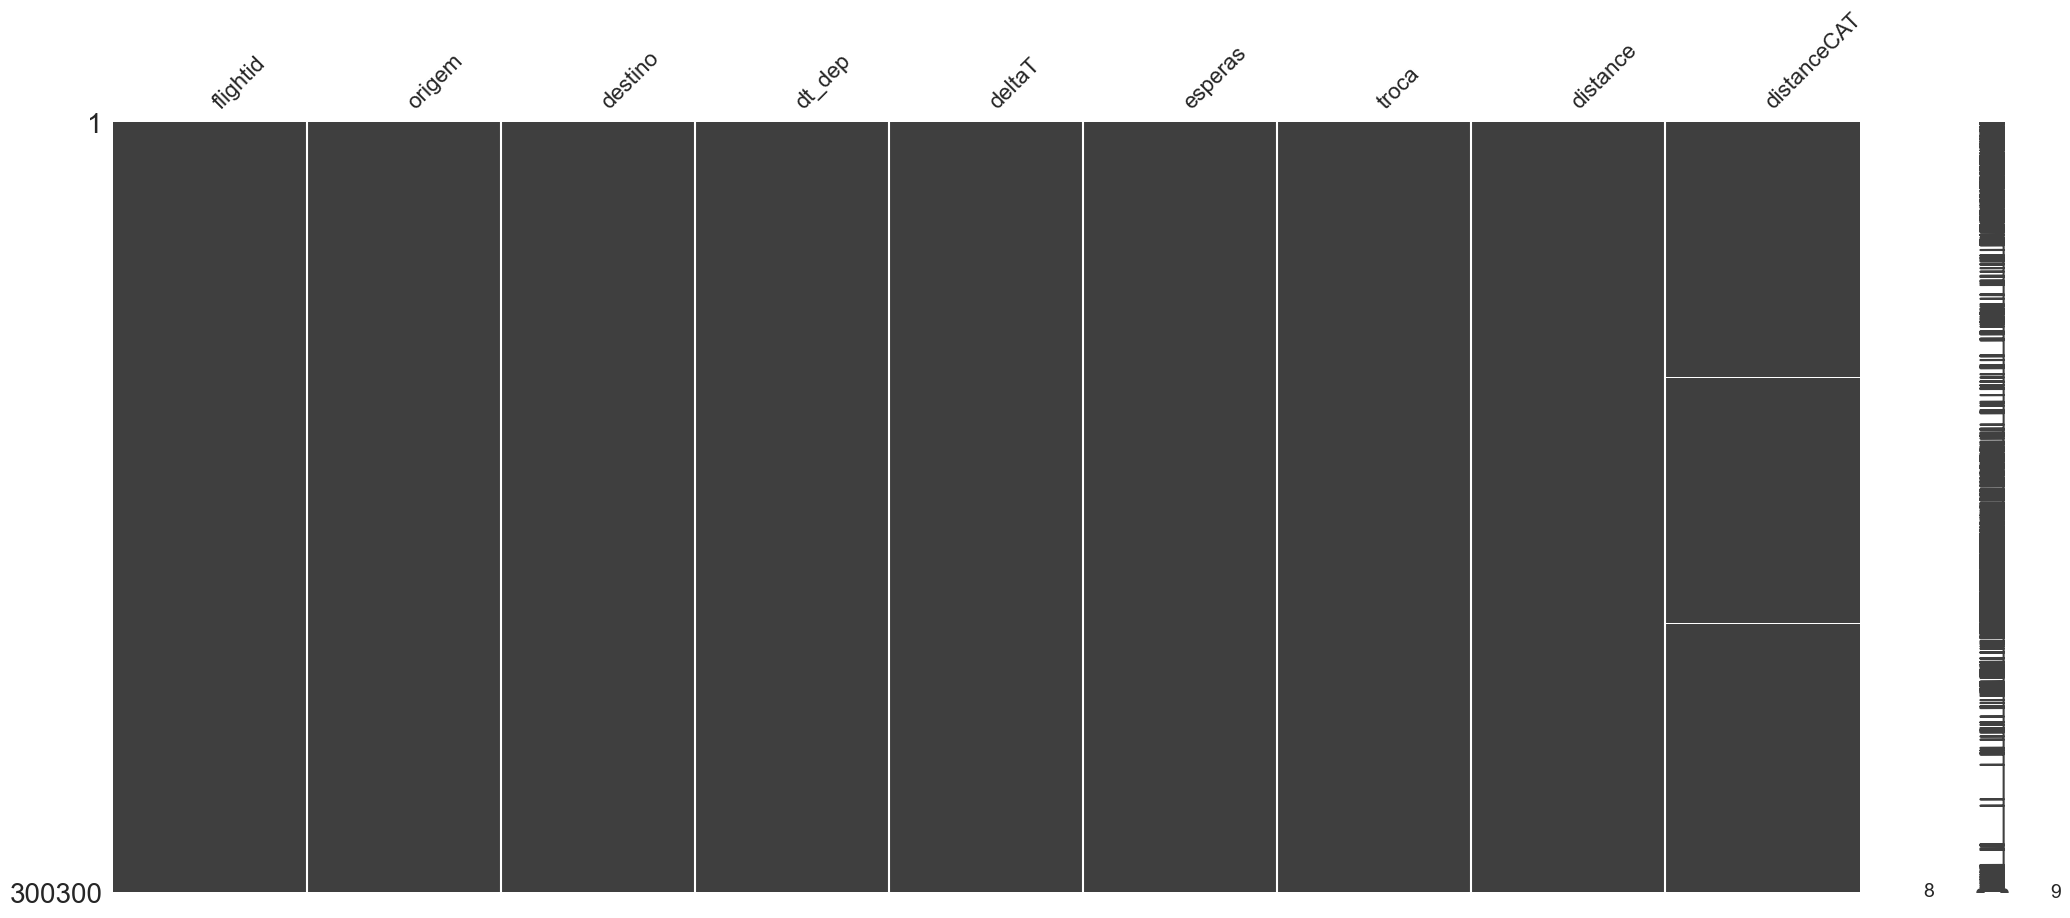

In [74]:
msno.matrix(data_merge)

data_merge['distanceCAT'].fillna(data_merge['distance'], inplace=True)


In [75]:
from sklearn.preprocessing import MinMaxScaler

# Crie um objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajuste e transforme as colunas 'distance' e 'distancecat62'
data_merge[['distance', 'distanceCAT']] = scaler.fit_transform(data_merge[['distance', 'distanceCAT']])

# Exiba o DataFrame com as colunas escaladas
display(data_merge)

,flightid,origem,destino,dt_dep,deltaT,esperas,troca,distance,distanceCAT
0,504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,2022-06-01 01:00:38,5547.0,0,0,0.340178,0.307171
1,052050016538ab736a254313ef009a6b,SBRJ,SBCF,2022-06-01 09:20:04,3006.0,0,0,0.126141,0.138888
2,e93e3b8510854a55f195788019b5763b,SBGR,SBPA,2022-06-01 01:20:45,5020.0,0,0,0.292304,0.273317
3,2386fcd950814c8d343d93c4b51585d1,SBGR,SBPA,2022-06-01 01:13:59,5262.0,0,0,0.292304,0.273317
4,f738e67220fcd688fed028a6389891e2,SBKP,SBPA,2022-06-01 01:26:38,5084.0,0,0,0.295106,0.268055
...,...,...,...,...,...,...,...,...,...
300295,c4321a6a09b76969df53965fb5390f12,SBBR,SBRF,2023-05-13 12:14:19,7564.0,0,0,0.558376,0.502192
300296,e4f5686cce45083566945c8946e5d120,SBBR,SBGR,2023-05-13 09:33:15,5126.0,0,0,0.288360,0.275567
300297,04f65a7c44cf176215520b4c9b4eb37f,SBCF,SBRF,2023-05-13 16:53:53,7591.0,0,0,0.542892,0.488602
300298,f72a0718e581d01c695faeeff35d81f0,SBSV,SBGR,2023-05-13 05:28:58,8743.0,0,0,0.489564,0.463675


In [76]:
# Importe as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suponha que você tenha um conjunto de dados (DataFrame) com colunas de recursos (X) e um alvo (y)
X =  data_merge.drop(['deltaT','flightid','origem','destino', 'dt_dep'], axis=1)
y =  data_merge['deltaT']

# Divida o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie um regressor Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100)

# Treine o modelo no conjunto de treinamento
rf_regressor.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = rf_regressor.predict(X_test)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprima as métricas de desempenho
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Erro Quadrático Médio (MSE): 732013.718700332
R-squared (R2): 0.8647534783557996


In [77]:
# Calcule os erros
erros = (y_test - y_pred)/(3600)

# Crie um DataFrame com as previsões, os valores reais e os erros
df_resultados = pd.DataFrame({'Previsões': y_pred, 'Valores Reais': y_test, 'Erros': erros})

df_resultados['erro_minutos']=df_resultados['Erros']*60
# Imprima o DataFrame
display(df_resultados)

,Previsões,Valores Reais,Erros,erro_minutos
12804,4674.582980,4494.0,-0.050162,-3.009716
161141,9830.178179,9450.0,-0.105605,-6.336303
171044,4645.387770,4215.0,-0.119552,-7.173130
182627,7759.234556,7637.0,-0.033954,-2.037243
187500,12193.957399,11810.0,-0.106655,-6.399290
...,...,...,...,...
238076,4867.406889,5058.0,0.052943,3.176552
192668,5218.068157,5035.0,-0.050852,-3.051136
289215,5486.661584,5823.0,0.093427,5.605640
116694,2497.860346,2303.0,-0.054128,-3.247672


In [78]:
rmse = np.sqrt(mse)
rmse

855.5780026977856

<Axes: title={'center': 'Feature Importance de um Random Forest'}, xlabel='Importância das Características'>

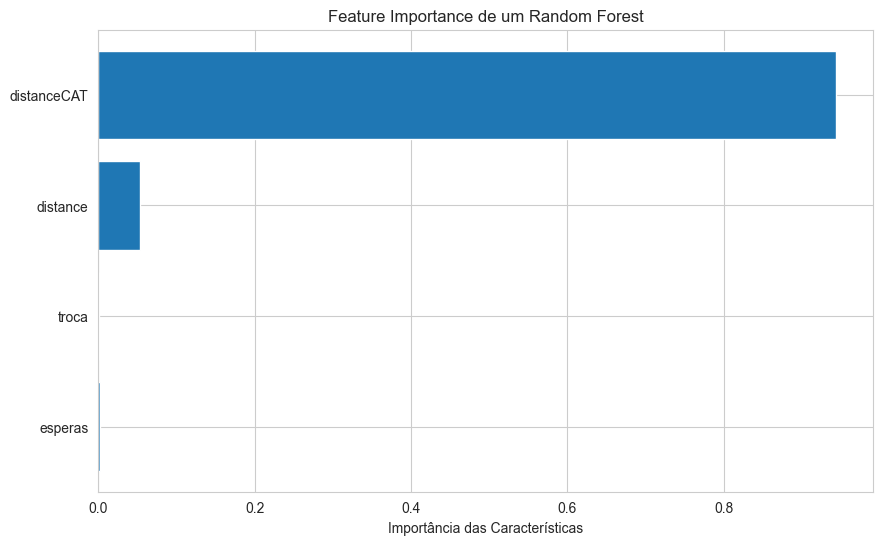

In [79]:
# Obtenha as importâncias das características do rf_regressoro
feature_importances = rf_regressor.feature_importances_
feature_names = X.columns

# Crie um gráfico de barras bonito para mostrar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel('Importância das Características')
plt.title('Feature Importance de um Random Forest')
plt.gca()


In [80]:
data_test = pd.read_csv('data/idsc_test.csv')
data_test.head(5)

,flightid,origem,destino,dt_dep,hora_ref,snapshot_radar,path,hora_esperas,esperas,aero_esperas,...,metaf,aero_metaf,hora_metar,metar,aero_metar,hora_tcp,troca,aero_tcp,hora_tcr,aero_tcr
0,7945735584a3297121c4f5ae0de8ecd1,SBKP,SBSV,2023-05-30 11:36:03.000,2023-05-30 11:00:00.000,MULTIPOINT ((-0.8807200448127578 -0.5148453155...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-30 10:00:00.000,0,SBSV,...,NaN,NaN,2023-05-30 11:00:00.000,METAR SBSV 301100Z 12009KT 9999 FEW023 28/21 Q...,SBSV,2023-05-30 12:00:00.000,0,SBSV,NaN,NaN
1,85cb958e8b9d583575cd9cb93e389226,SBFL,SBRJ,2023-05-19 08:26:06.000,2023-05-19 08:00:00.000,MULTIPOINT ((-0.8826266039383116 -0.4926305156...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-19 07:00:00.000,0,SBRJ,...,METAF SBRJ 190900Z 33004KT 9999 BKN033 ...,SBRJ,2023-05-19 08:00:00.000,METAR SBRJ 190800Z 02004KT 9999 FEW010 SCT040 ...,SBRJ,2023-05-19 09:00:00.000,0,SBRJ,NaN,NaN
2,2d4e8cd3947525a12ff16af520beefb9,SBCF,SBGR,2023-05-22 11:52:02.000,2023-05-22 11:00:00.000,MULTIPOINT ((-0.8972512464147154 -0.5215196550...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-22 10:00:00.000,0,SBGR,...,METAF SBGR 221200Z 04003KT CAVOK 19/09 Q1021=\n,SBGR,2023-05-22 11:00:00.000,METAR SBGR 221100Z 07006KT CAVOK 13/12 Q1022=,SBGR,2023-05-22 12:00:00.000,0,SBGR,NaN,NaN
3,24cf317a1494a016a018d9f5cd183639,SBFL,SBSP,2023-05-29 16:07:07.000,2023-05-29 16:00:00.000,MULTIPOINT ((-0.892972783728755 -0.51704889771...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-29 15:00:00.000,2,SBSP,...,METAF SBSP 291700Z 15010KT 9999 OVC033 ...,SBSP,2023-05-29 16:00:00.000,METAR SBSP 291600Z 12010KT 090V160 9999 SCT015...,SBSP,2023-05-29 17:00:00.000,0,SBSP,NaN,NaN
4,370babaf32dc82a6a64bf5b71a3434ed,SBCF,SBKP,2023-05-25 22:16:04.000,2023-05-25 22:00:00.000,MULTIPOINT ((-0.8970045369724385 -0.5240544927...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-25 21:00:00.000,0,SBKP,...,METAF SBKP 252300Z 08008KT CAVOK 21/12 Q1019=\n,SBKP,2023-05-25 22:00:00.000,METAR SBKP 252200Z 09004KT CAVOK 23/13 Q1020=,SBKP,2023-05-25 23:00:00.000,0,SBKP,NaN,NaN


In [81]:
data_test = data_test.merge(trajetorias, on=['origem','destino'],how='left')

data_test['distance'] = data_test.apply(calcular_distancia, axis=1)

data_test['distanceCAT'].fillna(data_test['distance'], inplace=True)

data_test[['distance', 'distanceCAT']] = scaler.transform(data_test[['distance', 'distanceCAT']])

data_test.head(5)

,flightid,origem,destino,dt_dep,hora_ref,snapshot_radar,path,hora_esperas,esperas,aero_esperas,...,hora_metar,metar,aero_metar,hora_tcp,troca,aero_tcp,hora_tcr,aero_tcr,distanceCAT,distance
0,7945735584a3297121c4f5ae0de8ecd1,SBKP,SBSV,2023-05-30 11:36:03.000,2023-05-30 11:00:00.000,MULTIPOINT ((-0.8807200448127578 -0.5148453155...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-30 10:00:00.000,0,SBSV,...,2023-05-30 11:00:00.000,METAR SBSV 301100Z 12009KT 9999 FEW023 28/21 Q...,SBSV,2023-05-30 12:00:00.000,0,SBSV,NaN,NaN,0.443140,0.491816
1,85cb958e8b9d583575cd9cb93e389226,SBFL,SBRJ,2023-05-19 08:26:06.000,2023-05-19 08:00:00.000,MULTIPOINT ((-0.8826266039383116 -0.4926305156...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-19 07:00:00.000,0,SBRJ,...,2023-05-19 08:00:00.000,METAR SBRJ 190800Z 02004KT 9999 FEW010 SCT040 ...,SBRJ,2023-05-19 09:00:00.000,0,SBRJ,NaN,NaN,0.238074,0.255557
2,2d4e8cd3947525a12ff16af520beefb9,SBCF,SBGR,2023-05-22 11:52:02.000,2023-05-22 11:00:00.000,MULTIPOINT ((-0.8972512464147154 -0.5215196550...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-22 10:00:00.000,0,SBGR,...,2023-05-22 11:00:00.000,METAR SBGR 221100Z 07006KT CAVOK 13/12 Q1022=,SBGR,2023-05-22 12:00:00.000,0,SBGR,NaN,NaN,0.173035,0.167123
3,24cf317a1494a016a018d9f5cd183639,SBFL,SBSP,2023-05-29 16:07:07.000,2023-05-29 16:00:00.000,MULTIPOINT ((-0.892972783728755 -0.51704889771...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-29 15:00:00.000,2,SBSP,...,2023-05-29 16:00:00.000,METAR SBSP 291600Z 12010KT 090V160 9999 SCT015...,SBSP,2023-05-29 17:00:00.000,0,SBSP,NaN,NaN,0.161687,0.164717
4,370babaf32dc82a6a64bf5b71a3434ed,SBCF,SBKP,2023-05-25 22:16:04.000,2023-05-25 22:00:00.000,MULTIPOINT ((-0.8970045369724385 -0.5240544927...,http://satelite.cptec.inpe.br/repositoriogoes/...,2023-05-25 21:00:00.000,0,SBKP,...,2023-05-25 22:00:00.000,METAR SBKP 252200Z 09004KT CAVOK 23/13 Q1020=,SBKP,2023-05-25 23:00:00.000,0,SBKP,NaN,NaN,0.170377,0.168138


In [82]:
data_test = data_test[['flightid','origem','destino','esperas','troca','distance','distanceCAT']]



data_test.head(5)

,flightid,origem,destino,esperas,troca,distance,distanceCAT
0,7945735584a3297121c4f5ae0de8ecd1,SBKP,SBSV,0,0,0.491816,0.443140
1,85cb958e8b9d583575cd9cb93e389226,SBFL,SBRJ,0,0,0.255557,0.238074
2,2d4e8cd3947525a12ff16af520beefb9,SBCF,SBGR,0,0,0.167123,0.173035
3,24cf317a1494a016a018d9f5cd183639,SBFL,SBSP,2,0,0.164717,0.161687
4,370babaf32dc82a6a64bf5b71a3434ed,SBCF,SBKP,0,0,0.168138,0.170377


In [83]:
X_test =  data_test[['esperas','troca','distance','distanceCAT']]

y_pred =  rf_regressor.predict(X_test)

#y_pred = y_pred.round(0)

y_pred

array([ 6982.44126759,  4002.81971067,  3284.323785  ,  3609.09892409,
        3275.7706006 ,  7498.12158481,  2634.18713318,  4150.85428238,
        4614.48366072,  7608.36898887,  7057.56360031,  4990.32293508,
        3265.48860159,  2497.86034628,  2497.86034628,  8116.98067619,
        4975.16942317,  2945.85769842,  5053.87075645,  3008.31764717,
        5067.01698786,  4645.38777025,  3959.91505788,  7635.62562485,
        2231.47041435,  4150.85428238,  4726.60097718,  5350.36648019,
        5246.59788927,  4622.47226738,  3008.31764717, 10227.77893744,
        7498.12158481,  4150.85428238,  2427.44298829,  5144.39643071,
        3015.22840207,  3233.81250264,  2231.47041435,  3284.323785  ,
        4944.40748362,  3233.81250264,  3289.6903416 ,  7608.36898887,
        5067.01698786,  3183.33091764,  5273.41259857,  7498.12158481,
        4772.70607568,  4746.88266671,  2601.87088385,  3510.43786648,
        7737.08850713,  4726.60097718,  4645.38777025,  2845.4711563 ,
      

In [84]:
data_submission = data_test[['flightid']].copy()
data_submission['solution'] = y_pred

data_submission = data_submission.rename(columns={'flightid':'ID'})

#data_submission['solution'] = data_submission['solution'].astype('int')
data_submission

,ID,solution
0,7945735584a3297121c4f5ae0de8ecd1,6982.441268
1,85cb958e8b9d583575cd9cb93e389226,4002.819711
2,2d4e8cd3947525a12ff16af520beefb9,3284.323785
3,24cf317a1494a016a018d9f5cd183639,3609.098924
4,370babaf32dc82a6a64bf5b71a3434ed,3275.770601
...,...,...
95,6f6d576aafbd90e308a848a060395e9a,5067.016988
96,20055ed6ecea5e916923081fc3b049f7,3275.770601
97,c5e4e8d78906ae2b3218847cc9f045d9,2497.860346
98,878ad3e9104c78f2945f6194c2d883ce,4867.406889


In [85]:
data_submission.to_csv('lascou2.csv',index=False)

## Testando Modelos com Pycaret

In [ ]:
pip install --use-deprecated=legacy-resolver pycaret[full]

In [ ]:
from pycaret.regression import *

In [ ]:
X_train['solution'] = y_train

In [ ]:
# exp_clf101 = setup(data = X_train,
#                    target = 'solution',
#                    normalize = False,
#                    transformation = False,
#                   #  ignore_low_variance = False,
#                    feature_selection=False,
#                    transform_target=False,
#                    remove_multicollinearity = False)

In [ ]:
# best_model = compare_models(sort = 'mse',n_select = 1,fold=3)

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Gradient Boosting
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Treinar o modelo
gradient_boosting.fit(X_train, y_train)

# Fazer previsões
y_pred = gradient_boosting.predict(X_test)

# Calcular o erro quadrático médio (MSE) para avaliar o desempenho
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")

# Agora você pode usar o modelo treinado para fazer previsões em novos dados


Erro Quadrático Médio (MSE): 776880.8381447598


In [ ]:
data_raw['data_hora'] = data_raw['metar'].str.extract(r'(\d{6}Z)')
data_raw['vento'] = data_raw['metar'].str.extract(r'(\d{5}KT)')
data_raw['cavok'] = data_raw['metar'].str.contains('CAVOK', case=False)
data_raw['temp'] = data_raw['metar'].str.extract(r'(\d{2}/\d{2})')
data_raw[['temperatura', 'temp_orvalho']] = data_raw['temp'].str.split('/', expand=True)
data_raw['pressao'] = data_raw['metar'].str.extract(r'Q(\d{4})')
data_raw['direcao'] = data_raw['vento'].str.extract(r'(\d{3})\d{2}KT')
data_raw['velocidade'] = data_raw['vento'].str.extract(r'\d{3}(\d{2})KT')

In [ ]:
data_raw

,flightid,origem,destino,dt_dep,dt_arr,deltaT,hora_ref,hora_esperas,hora_metaf,hora_metar,...,aero_tcp,data_hora,vento,cavok,temp,temperatura,temp_orvalho,pressao,direcao,velocidade
0,fcb2bf90345705318213ae1307c0f901,SBKP,SBRJ,2022-06-01 00:44:57,1.654047e+09,2463000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,...,SBRJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c7c5c10716335b048f86d8c52fcba3f2,SBGR,SBRJ,2022-06-01 00:57:01,1.654047e+09,2152000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,...,SBRJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3162de7203a972f071d5a48e8f0f4828,SBBR,SBRJ,2022-06-01 00:26:52,1.654048e+09,4613000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,...,SBRJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8fcd243e9b9eebbe62ab145ce04b6ab5,SBKP,SBCF,2022-06-01 00:58:40,1.654048e+09,2581000,2022-06-01 00:00:00,2022-05-31 23:00:00,2022-06-01 01:00:00,2022-06-01 00:00:00,...,SBCF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,504a62621cd231d6ab67e674ce538cd3,SBCF,SBFL,2022-06-01 01:00:38,1.654051e+09,5547000,2022-06-01 01:00:00,2022-06-01 00:00:00,2022-06-01 02:00:00,2022-06-01 01:00:00,...,SBFL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300344,c4321a6a09b76969df53965fb5390f12,SBBR,SBRF,2023-05-13 12:14:19,1.683988e+09,7564000,2023-05-13 12:00:00,2023-05-13 11:00:00,2023-05-13 13:00:00,2023-05-13 12:00:00,...,SBRF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300345,e4f5686cce45083566945c8946e5d120,SBBR,SBGR,2023-05-13 09:33:15,1.683976e+09,5126000,2023-05-13 09:00:00,2023-05-13 08:00:00,2023-05-13 10:00:00,2023-05-13 09:00:00,...,SBGR,131000Z,11004KT,False,12/11,12,11,1019,110,04
300346,04f65a7c44cf176215520b4c9b4eb37f,SBCF,SBRF,2023-05-13 16:53:53,1.684004e+09,7591000,2023-05-13 16:00:00,2023-05-13 15:00:00,2023-05-13 17:00:00,2023-05-13 16:00:00,...,SBRF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300347,f72a0718e581d01c695faeeff35d81f0,SBSV,SBGR,2023-05-13 05:28:58,1.683964e+09,8743000,2023-05-13 05:00:00,2023-05-13 04:00:00,2023-05-13 06:00:00,2023-05-13 05:00:00,...,SBGR,130600Z,16004KT,False,12/11,12,11,1019,160,04


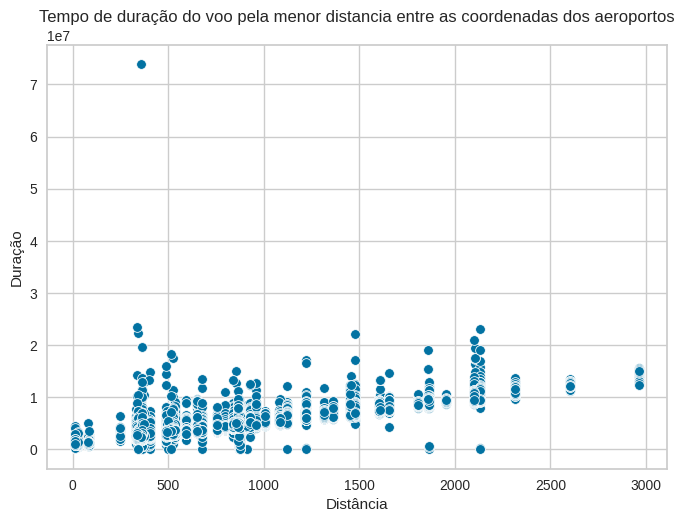

In [ ]:
data_raw['distance'] = data_raw.apply(calcular_distancia, axis=1)
data_raw = data_raw[(data_raw['deltaT']>=0)&(data_raw['distance']>0)]
sns.scatterplot(data= data_raw, x='distance', y='deltaT', hue='velocidade').set(title = 'Tempo de duração do voo pela menor distancia entre as coordenadas dos aeroportos', xlabel='Distância', ylabel='Duração')
plt.show()

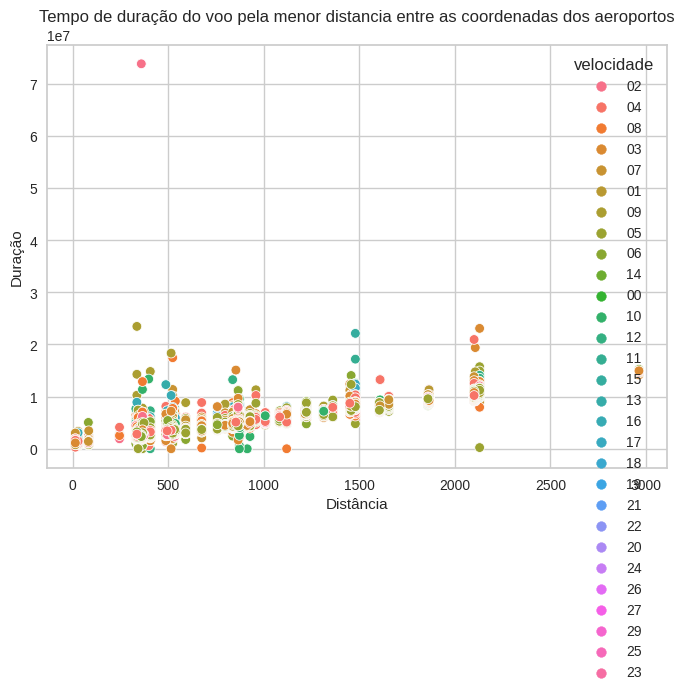

In [ ]:
sns.scatterplot(data= data_raw, x='distance', y='deltaT', hue='velocidade').set(title = 'Tempo de duração do voo pela menor distancia entre as coordenadas dos aeroportos', xlabel='Distância', ylabel='Duração')
plt.show()

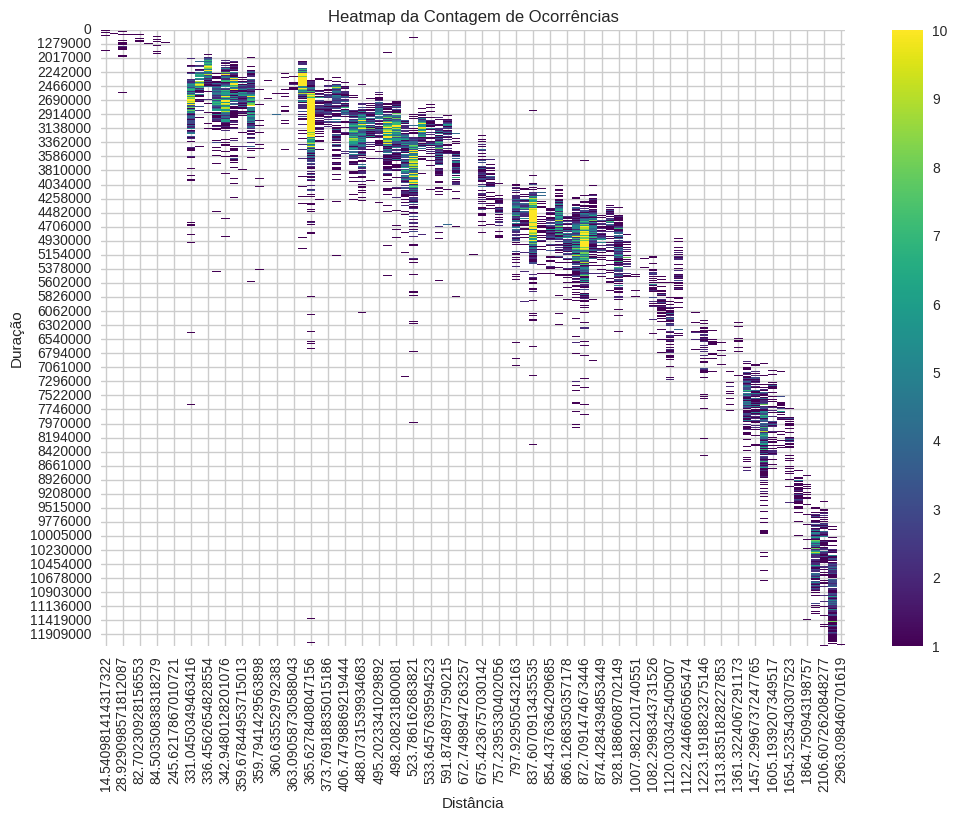

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vamos criar uma tabela pivot para contar ocorrências
data_raw['velocidade'] = data_raw['velocidade'].astype('float')
heatmap_data = data_raw[data_raw['velocidade'] >= 0].pivot_table(index='deltaT', columns='distance', values='velocidade', aggfunc='count')

# Criar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', vmax=10)
plt.title('Heatmap da Contagem de Ocorrências')
plt.xlabel('Distância')
plt.ylabel('Duração')
plt.show()
